In [2]:
# Libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Classification Exploration/Modeling
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Custom Imports
from acquire import get_mush_data
from prepare import split_mush_data
from prepare import prepare_mush
from prepare import encode_y
from charts import hab_chart
from charts import pop_chart
from charts import odor_chart
from charts import cap_chart


import warnings
warnings.filterwarnings('ignore')

<center><h1>Mushroom Classification Project<h1></center>

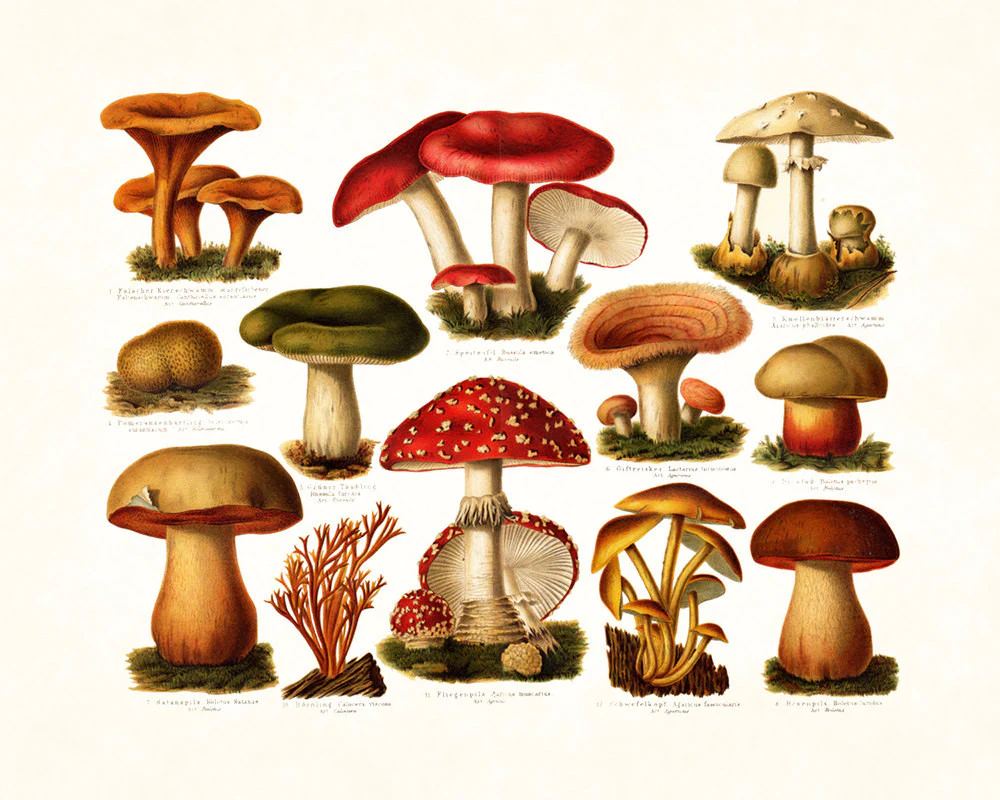

# Project Objectives: 
The goal of this project is to clean and organize mushroom data and create a model that can accurately predict what class the mushroom is in, which in this case, is either edible or poisonous. Having a model that will accurately depict this can save many lives, as in many cases, eating poisonous mushrooms can be a death sentence. We have acquired data that tells us characteristics about an assortment of mushrooms that will help us decide what are important features that can help our predictions.

- Construct a Classification model that can properly predict the class of mushrooms.

- Present a report that shows my processes and how I came to my conclusions. 


## Project Goals:
My goals are to use the data I have to create a ML Classification model that can accurately predict when a mushroom is either edible or poisonous. Through exploring the data I have, I want to be able to zero in on features that I consider to be directly correlated in predicting a mushrooms class. I want my final model to be as accurate as possible, as the models predictions of False Negatives is extremely important for one that is relying on the model.




## Executive Summary: 
Evidence from statisal tests and visualizations supports the claim that the cap color, odor, habitat and population of mushrooms are related to their class. My recommendation is to focus on these features when attempting to identify as a mushroom is poisonous or edible, as these features have shown trends that help predict its class.

# Acquire the Data

The data was acquired from [Kaggle.com](https://www.kaggle.com/datasets/uciml/mushroom-classification?datasetId=478&sortBy=voteCount). Kaggle is a wonderful website with datasets you can download directly onto your personal device to explore. In order to use this dataset, you will need to click on the hyperlink that will take you directly to this Mushroom Dataset. There will be a button for you to download the CSV directly onto your device.

In [3]:
#Grabbing our CSV file that is saved on my device
df = get_mush_data()
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Prepare the Data

To prepare the data, I checked for nulls but there weren't any. This data set was very clean, so the biggest piece of work was changing any columns with '-' to '_'. 

The reason we want to do this is because calling columns that contain dashes can be tricky and sometimes doesn't work. We want to avoid any issues that may occur later on so we can focus in on our testing and modeling.

Since I planned on using 'cap_color', 'odor', 'habitat', and 'population' as my features, I needed to create a dummies dataframe because they are non-binary.


Other functions created:


<font color= green><b>def split_mush_data(df):</font></b> This function was created to split our mushroom data into train, validate, and test. This is nested in the prepare function, so it does not need to be called seperately.


<font color= green><b>def encode_y(x):</font></b>This function is created for Logistic Regression model to turn y into a binary column during modeling phase. 
    

# Explore

### The Big Question: What features have a direct relationship with mclass?

Our target variable is mclass, so we will be comparing the other columns to this to determine our goal.



## Initial Hypothesis:
- cap_color (The mushroom cap color) is related to mclass.
- the odor of the mushroom helps determine its mclass.
- the habitat of mushrooms help determine its mclass.
- the population of mushrooms can help determine its mclass.

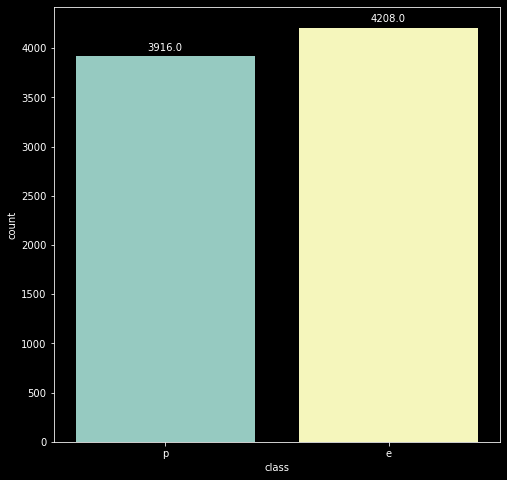

In [5]:
#create bar graph to compare our mclass
plt.style.use('dark_background')
plt.rcParams['figure.figsize']=8,8 
s = sns.countplot(x = "class", data = df)
for p in s.patches:
    s.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()

## Takeaway:

There are more edible than poisoneous mushrooms, so that means edible is also our baseline.

In [6]:
# Now lets split and get ready for our visuals and stat testing
train, validate, test = prepare_mush(df)

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (4549, 51)
validate -> (1950, 51)
test -> (1625, 51)


In [7]:
# Setting alpha to standard
alpha = .05

## Question: Does habitat help us determine mclass?

Hypothesis:

H0 = There is no relationship between habitat and mclass.

H1 = There is a relationship between habitat and mclass.

For my visuals, I created them all into functions since they were big bulks of code. The charts I created are to show the relationship between mclass and the feature we are looking at. If you would like to take a look at the chart code in more detail, you can do so by clicking [here](https://github.com/paigerackley/mushroom-classification-project/blob/main/charts.py).

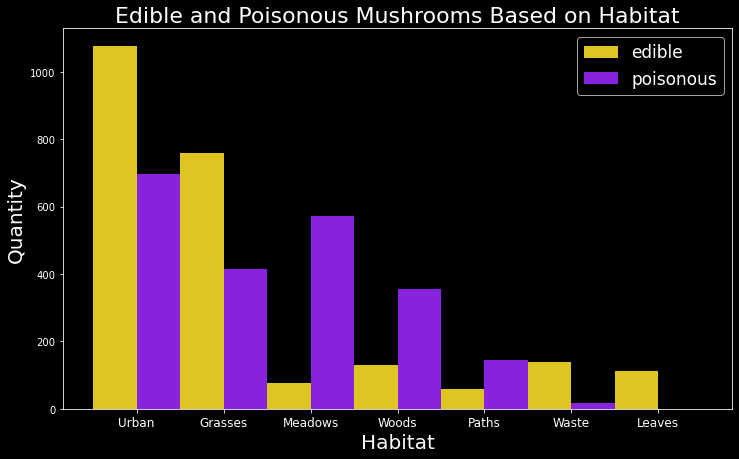

In [8]:
#habitat chart
hab_chart(train)

#### Takeaways:
    - Nothing super destinguishable.
     - Biggest takeaways:
       - If in an urban or grassy area, the mushroom will more likely be edible.
       - Poisonous mushrooms tend to me in meadows and woods, so farther from civilization.

In [9]:
# chi squared test to look at relationship, if there is any
observed1 = pd.crosstab(train.habitat, train.mclass)

# scipy function calculates values based on the crosstab created
chi2, p, degf, expected = chi2_contingency(observed1)

if p < alpha:
    print('\nP is less than alpha. We reject the null hypothesis.')


P is less than alpha. We reject the null hypothesis.


#### Therefore, habitat does help us determine class.

## Question: Can population help us determine mclass?

Hypothesis:

H0 = There is no relationship between population and mclass.

H1 = There is a relationship between population and mclass.

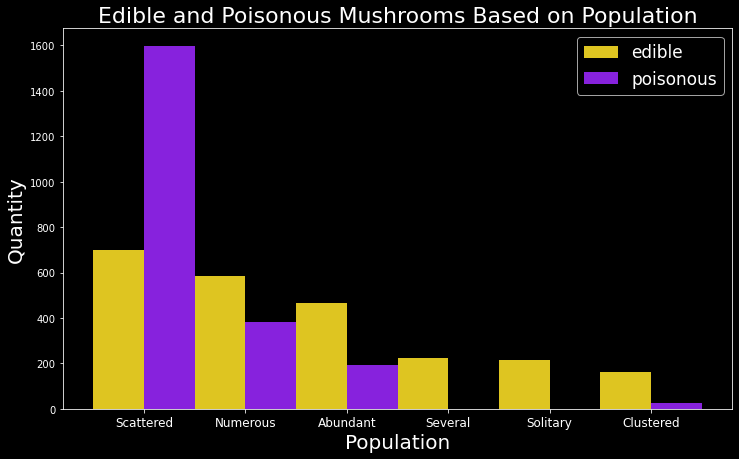

In [10]:
# population chart
pop_chart(train)

#### Takeaways:
      - Mixed results, shows a small relationship.
      - Biggest takeaway is that if there are scattered, they are most likely poisoneous.

In [11]:
# chi squared test to look at relationship, if there is any
observed2 = pd.crosstab(train.population, train.mclass)

# scipy function calculates values based on the crosstab created
chi2, p, degf, expected = chi2_contingency(observed2)

if p < alpha:
    print('\nP is less than alpha. We reject the null hypothesis.')


P is less than alpha. We reject the null hypothesis.


#### Therefore, population can help us determine mclass.

## Question: Does odor help us determine class?

Hypothesis:

H0 = There is no relationship between odor and mclass.

H1 = There is a relationship between odor and mclass.

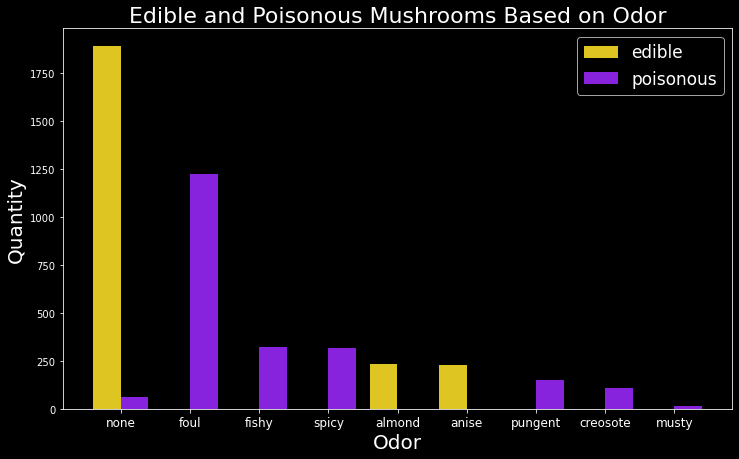

In [12]:
# odor chart
odor_chart(train)

#### Takeways:
        - Shows a very clear relationship between odor and class
        - Edible have either no smell or smell like foods we like (almond, anise) while poisonous tend to have strong and sometimes offputting smells that should raise a red flag.

In [13]:
# chi squared for relationship
observed3 = pd.crosstab(train.odor, train.mclass)

# scipy function calculates values based on the crosstab created
chi2, p, degf, expected = chi2_contingency(observed3)

if p < alpha:
    print('\nP is less than alpha. We reject the null hypothesis.')


P is less than alpha. We reject the null hypothesis.


#### Therefore, odor does help us determine mclass.

## Question: Does cap_color(the mushrooms cap color) help us determine mclass?

Hypothesis:

H0 = There is no relationship between cap_color and mclass.

H1 = There is a relationship between cap_color and mclass.

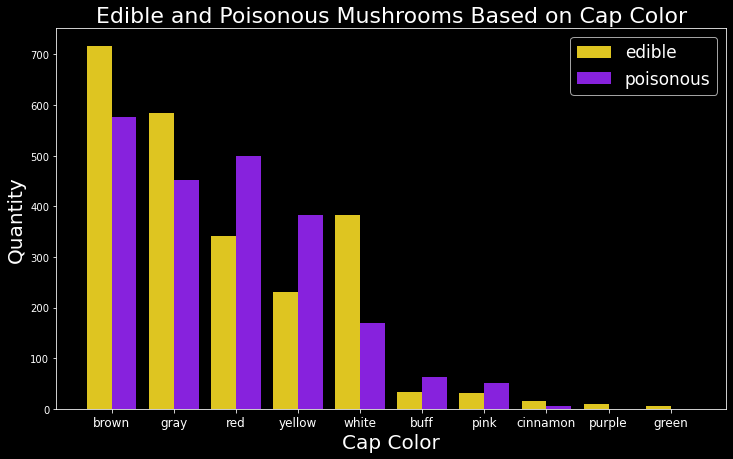

In [14]:
# cap color chart
cap_chart(train)

#### Takeaways:
        - Clear relationship between the feature and target variable
        - Biggest takeway is that edible tends to be browns/greys/neutrals while poisonous tend to be brighter, red/pink the majoirty of the time.

In [15]:
# chi squared
observed4 = pd.crosstab(train.cap_color, train.mclass)

# scipy function calculates values based on the crosstab created
chi2, p, degf, expected = chi2_contingency(observed4)

if p < alpha:
    print('\nP is less than alpha. We reject the null hypothesis.')


P is less than alpha. We reject the null hypothesis.


#### Therefore, cap_color does help us determine mclass.

## Exploration Summary: 
Exploration through visuals and chi squared tests show a relationship between the four features explored and our target variable. We will continue to use these in our modeling stages.

# Modeling

### Setting up our 3 splits for modeling:

In [16]:
#All columns that need to be dropped, not features or mclass which is the target variable.
columns_to_drop = ['mclass', 'cap_shape', 'cap_surface', 'bruises', 'gill_attachment', 'gill_spacing',
                  'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
                  'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type',
                  'veil_color', 'ring_number', 'ring_type', 'cap_color', 'odor', 'habitat', 'population', 'spore_print_color']

In [17]:
# Create the object
X_train = train.drop(columns = columns_to_drop)
y_train = train.mclass

X_validate = validate.drop(columns = columns_to_drop)
y_validate = validate.mclass

X_test = test.drop(columns = columns_to_drop)
y_test = test.mclass

## What are we focusing on?

Since False Negatives are very important in this case, we are wanting to focus on our precision and accuracy. A False Negative in this case would mean that we would claim a mushroom is edible when it was poisoneous which could be a life or death situation, so we are wanting the highest accuracy and highest precision as possible.

## Train

### Decision Tree

In [18]:
# After testing our max depth 6 is what we stuck with

df = DecisionTreeClassifier(max_depth=6, random_state=123)

df.fit(X_train, y_train)

y_pred = df.predict(X_train)
y_pred_proba = df.predict_proba(X_train)

#evaluate metrics
print('Accuracy of model with all features in train set:', df.score(X_train, y_train))
print('\nThe confusion matrix:\n',confusion_matrix(y_train, y_pred))
print('\nClassification report:\n',classification_report(y_train, y_pred))

Accuracy of model with all features in train set: 0.9758188612881952

The confusion matrix:
 [[2257   94]
 [  16 2182]]

Classification report:
               precision    recall  f1-score   support

           e       0.99      0.96      0.98      2351
           p       0.96      0.99      0.98      2198

    accuracy                           0.98      4549
   macro avg       0.98      0.98      0.98      4549
weighted avg       0.98      0.98      0.98      4549



## Random Forrest

In [ ]:
# We will set our depth to 8
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=8, 
                            random_state=123)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)
print('Accuracy of model with all features in train set:', rf.score(X_train, y_train))
print('\nThe confusion matrix:\n',confusion_matrix(y_train, y_pred))
print('\nClassification report:\n',classification_report(y_train, y_pred))

### KNN

In [ ]:
# setting neighbors to 30
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)
print('Accuracy of model with all features in train set:', knn.score(X_train, y_train))
print('\nThe confusion matrix:\n',confusion_matrix(y_train, y_pred))
print('\nClassification report:\n',classification_report(y_train, y_pred))

In [ ]:
# setting up our y columns for logistic regression, these encoded columns will also be used if we decided to move this model to validate/test
applyall = np.vectorize(encode_y)
y_train_encoded = applyall(y_train)
y_validate_encoded = applyall(y_validate)
y_test_encoded = applyall(y_test)

### Logistic Regression

In [ ]:
# as shown, we use the encoded versions of the columns but only for this model
lr = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

lr.fit(X_train, y_train_encoded)

y_pred = lr.predict(X_train)
y_pred_proba = lr.predict_proba(X_train)

print('Accuracy of model with all features in train set:', lr.score(X_train, y_train_encoded))
print('\nThe confusion matrix:\n',confusion_matrix(y_train_encoded, y_pred))
print('\nClassification report:\n',classification_report(y_train_encoded, y_pred))

#### Takeways after Train models:

As shown, all of these models are extremely close in precision and accuracy. Another question is, are we seeing overfitting? There is really no way to know at this point until we test our models on validate. If we see an extreme loss of performance, we will know that we are overfit. With everything considered, it seems it will be best to move all 4 models into validate to check.

## Validate

### Decision Tree

In [ ]:
# not changing anything except using validate now
df = DecisionTreeClassifier(max_depth=6, random_state=123)

df.fit(X_validate, y_validate)

y_pred = df.predict(X_validate)
y_pred_proba = df.predict_proba(X_validate)

#evaluate metrics
print('Accuracy of model with all features in train set:', df.score(X_validate, y_validate))
print('\nThe confusion matrix:\n',confusion_matrix(y_validate, y_pred))
print('\nClassification report:\n',classification_report(y_validate, y_pred))

### Random Tree

In [ ]:
# no changes
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=8, 
                            random_state=123)
rf.fit(X_validate, y_validate)
y_pred = rf.predict(X_validate)
y_pred_proba = rf.predict_proba(X_validate)
print('Accuracy of model with all features in train set:', rf.score(X_validate, y_validate))
print('\nThe confusion matrix:\n',confusion_matrix(y_validate, y_pred))
print('\nClassification report:\n',classification_report(y_validate, y_pred))

### KNN

In [ ]:
# no changes
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_validate, y_validate)

y_pred = knn.predict(X_validate)
y_pred_proba = knn.predict_proba(X_validate)
print('Accuracy of model with all features in train set:', knn.score(X_validate, y_validate))
print('\nThe confusion matrix:\n',confusion_matrix(y_validate, y_pred))
print('\nClassification report:\n',classification_report(y_validate, y_pred))

### Logistic Regression

In [ ]:
# remember encoded columns

lr = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

lr.fit(X_validate, y_validate_encoded)

y_pred = lr.predict(X_validate)
y_pred_proba = lr.predict_proba(X_validate)

print('Accuracy of model with all features in train set:', lr.score(X_validate, y_validate_encoded))
print('\nThe confusion matrix:\n',confusion_matrix(y_validate_encoded, y_pred))
print('\nClassification report:\n',classification_report(y_validate_encoded, y_pred))

#### Takeways from Validate:
    - We can confirm overfitting is not happening, as our performance did not plummit.
    - Still very consistent and high 90's.
    - KNN dropped the most.

#### Although all of our models did perform wonderfully, we have to decide which to move into Test. I went with my Random Tree model, as all of our stats stuck at 99%.

## Test

In [ ]:
# One last one 

rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=8, 
                            random_state=123)
rf.fit(X_test, y_test)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)
print('Accuracy of model with all features in train set:', rf.score(X_test, y_test))
print('\nThe confusion matrix:\n',confusion_matrix(y_test, y_pred))
print('\nClassification report:\n',classification_report(y_test, y_pred))

## In conclusion:

#### After our testing, we were able to prove that cap color, odor, habitat and population were major features that were able to determine a mushrooms class.

#### Out of all of our models, we were able to get a Random Forest model with an accuracy of 99% and precision of 99%.

#### Although the other models did not beat Random Forest, they all did exceptionally well, with not one result of the 4 dropping below a 96%.

### With more time:

     - I would like to explore other features to see how much they help in determining class.
     - I would also like to see if there were columns that not only help determine class, but if some columns/features were dependent of one another as well.
     
### My recommendations:

    - When trying to determine if a mushroom is poisonous or edible:
        - Most edible mushrooms are browns/grays while poisonous tend be brighter, pink/red.
        - Most edible mushrooms smell like nothing, or like other familiar foods (almonds, anise) while poisonous tend to be offputting (fishy, foul, pungent, spicy)
        - The likelihood of a mushroom being poisonous if on its own and not in a group is extremely likely.

